In [80]:
#import libraries:
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib.image import imread 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray
from PIL import Image
from skimage import io
from numpy import *

In [81]:
#read in image CSV file:
imgs = pd.read_csv("C:/Users/Workman/Documents/STA142A_W22/vehcle_img_data.csv")
imgs.head()


C:\Users\Wyatt\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Image_Path,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity
0,vehicle_images/1633889154186_Toyota Hilux 2006...,Toyota,Hilux,Hilux,2006,Used,Manual,SUV / 4x4,Diesel,"2,500 cc"
1,vehicle_images/1633889154395_Land Rover Freela...,Land Rover,Freelander,1999,1999,Used,Manual,SUV / 4x4,Diesel,"1,990 cc"
2,vehicle_images/1633889154545_Nissan Leaf G Gra...,Nissan,Leaf,G Grade,2014,Used,Automatic,Hatchback,Electric,70 cc
3,vehicle_images/1633889154697_Mercedes Benz C20...,Mercedes Benz,C200,C-Cabriolet AMG Line,2016,Used,Automatic,Convertible,Petrol,"2,000 cc"
4,vehicle_images/1633889154870_Toyota Vitz 2018 ...,Toyota,Vitz,2018,2018,Used,Automatic,Hatchback,Petrol,"1,000 cc"


In [82]:
imgs.iloc[10200,]

Image_Path                NaN
Brand                   Mazda
Model                 Familia
Edition                   NaN
Year                     1986
Condition                Used
Transmission           Manual
Body            Station wagon
Fuel                   Petrol
Capacity             1,200 cc
Name: 10200, dtype: object

In [83]:
#extract rows where image_path is not blank:
#replace blanks in image path col with NA:
imgs["Image_Path"].replace('', np.nan, inplace=True)

#keep rows without NA in the image path column:
imgs = imgs[imgs["Image_Path"].notna()]
print(len(imgs))

77978


In [84]:
#load an image:
print(imgs.iat[10200,0])
string = "C:/Users/Workman/Documents/STA142A_W22/vehicle_images/" + imgs.iat[10199,0]
img = rgb2gray(Image.open(string))

vehicle_images/1635909610415_Toyota Vitz Safety 2019 for sale.jpg


(107, 142)


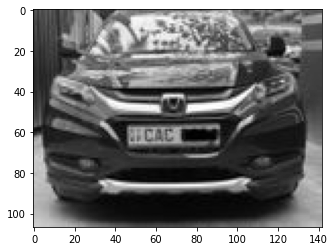

In [85]:
plt.imshow(img, cmap = "gray" )
print(np.shape(img))

(75, 100)
[[0.31156078]
 [0.28578431]
 [0.3224702 ]
 ...
 [0.73931529]
 [0.71970745]
 [0.7222302 ]]


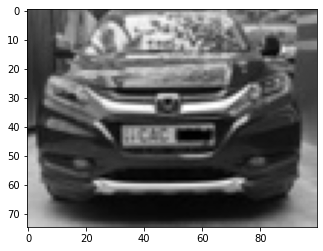

In [86]:
img2 = rgb2gray(Image.open(string).resize((100,75)))
plt.imshow(img2, cmap = "gray")
print(np.shape(img2))
print(np.asarray(img2).reshape(7500,1))

In [96]:
#create function to resize images to smallest dimension in dataset:
def img_resize(img_df, img_loc, dims = (100,75), path = "C:/Users/Workman/Documents/STA142A_W22/vehicle_images/"):
    #create image path and open image:
    string = str(path) + img_df.iat[img_loc[0], img_loc[1]]
    try:
        img = rgb2gray(Image.open(string).resize(dims))
        #convert image to numpy vector:
        img_vec = np.asarray(img).reshape(7500,1)
        return img_vec
    except:
        pass

    

In [97]:
img_vec = [(img_resize(imgs, (i,0))) for i in range(0,len(imgs))]

In [100]:
#verify that this vector corresponds to the one printed earlier:
(img_vec[10199])

array([[0.31156078],
       [0.28578431],
       [0.3224702 ],
       ...,
       [0.73931529],
       [0.71970745],
       [0.7222302 ]])

In [101]:
#extract arrays from list of arrays:
imgs_concat = [img_vec[i] for i in range(0,len(img_vec))]

In [103]:
del imgs_concat[76396]

In [104]:
img_array = np.stack(imgs_concat, axis = 0)

In [105]:
img_array = img_array.reshape(77977,(7500*1))

In [106]:
print(np.shape(img_array))

(77977, 7500)


In [107]:
img_array = img_array.astype("float16")

In [108]:
#Turn array into npz file:
#savez_compressed("img_array.npz", img_array)
